<a href="https://www.kaggle.com/code/andrexibiza/titanic-machine-learning-from-disaster?scriptVersionId=219691251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic - Machine Learning from Disaster

**Andrex Ibiza, MBA**
2025-01-16

# v4.1 Notes
This R script is crafted to analyze and predict the survival of passengers aboard the Titanic using advanced machine learning techniques. It employs a variety of R packages to facilitate data manipulation, visualization, and model training, aiming to preprocess the data, engineer significant features, and apply a machine learning model to forecast the survival outcomes in the test dataset.

The script initiates by loading essential libraries, including `caret`, `dplyr`, `ggplot2`, `Hmisc`, `naniar`, and `randomForest`. These libraries are pivotal for machine learning, data manipulation, visualization, and managing missing data. Following this, the training and test datasets are imported from CSV files, setting the stage for subsequent analysis.

In the data cleaning and preprocessing phase, the script encodes categorical variables such as `Sex` and `Pclass` into numeric factors, ensuring they are suitable for machine learning models. It also performs one-hot encoding for the `Embarked` variable to handle categorical data effectively. Addressing missing values is a critical step; the script imputes missing values in the Embarked column with the mode and predicts missing `Age` values using a random forest model trained on complete cases. This ensures that the dataset is as complete and accurate as possible before model training.

Feature engineering is a significant component of this script, where new features like `FamilySize`, `GroupSize`, `FarePerPerson`, and `ChildInFamily` are created. These features are designed to capture additional information that might influence survival, such as family dynamics and economic status. The `Deck` feature is derived from the Cabin information, with missing values replaced by `"U"` to indicate unknown decks. This step enriches the dataset with potentially predictive features.

The script also applies a log transformation to the `Fare` and `FarePerPerson` features. This transformation is crucial for reducing skewness and handling outliers, which can adversely affect model performance. By normalizing these features, the script ensures that the model can learn more effectively from the data.

For model training and prediction, the script employs a Support Vector Machine (SVM), utilizing cross-validation to predict the `Survived` variable. This model is trained on a comprehensive set of features, including those engineered in previous steps, to capture complex patterns in the data. The trained model is then used to predict survival on the test dataset, providing insights into the factors that may have influenced survival rates.

Finally, the script prepares a submission file containing the `PassengerId` and predicted `Survived` status for the test dataset. This file is formatted for evaluation in a competition setting, such as the Kaggle Titanic competition, where predictive accuracy is key. Overall, this script offers a robust framework for analyzing the Titanic dataset, emphasizing feature engineering and model training to enhance prediction accuracy and uncover insights into the factors affecting passenger survival.

Thank you to Pawel Kauf for your valuable feedback!

# Introduction
This script represents my continued exploration of the Titanic dataset, aiming to enhance the predictive accuracy of survival outcomes for passengers aboard the ill-fated ship. Building upon my initial model, which achieved approximately 70% accuracy, this iteration seeks to delve deeper into the dataset by employing a more sophisticated approach to data exploration, handling missing values, and engineering insightful features. By leveraging advanced data manipulation techniques and machine learning models, this project aspires to uncover hidden patterns and improve the robustness of predictions. The ultimate goal is to surpass previous performance benchmarks and gain a more comprehensive understanding of the factors influencing survival, as part of the ongoing Kaggle Titanic competition.

## Files
* `gender_submission.csv`: example of what the final submitted file should look like with two columns: `PassengerID` and `Survived`.
* `train.csv`: labeled data (`Survived`) used to build the model. 11 columns
* `test.csv`: 12 columns

## Data dictionary
| Variable	| Definition | Key | Notes |
| --- | --- | --- | --- |
| survival	| Survival	| 0 = No, 1 = Yes | --- |
| pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd | Proxy for SES- 1st=upper, 2nd=middle, 3rd=lower |
| sex	| Sex | --- | --- |
| Age	| Age in years | --- | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
| sibsp	| # of siblings / spouses aboard the Titanic | --- | Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored) |
| parch	| # of parents / children aboard the Titanic | --- | Parent = mother/father, Spouse = husband, wife (mistresses and fiances ignored). Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket | Ticket number | --- | --- |
| fare	| Passenger fare | --- | --- |
| cabin	| Cabin number | --- | --- |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | --- ||mpton | --- |

# Exploratory Data Analysis

In embarking on the analysis of the Titanic dataset, the initial step involves loading the `test.csv` file into a dataframe to thoroughly examine its structure, data types, and any missing values. This foundational step is crucial for understanding the dataset's composition and preparing it for subsequent analysis. The `Hmisc` package is particularly valuable in this context, offering a robust `describe()` function that delivers comprehensive summary statistics for each variable. This function not only provides insights into the distribution and central tendencies of the data but also highlights missing values, which are critical to address for accurate modeling. By leveraging these tools, we lay the groundwork for a detailed exploratory data analysis, setting the stage for effective data cleaning, feature engineering, and model building.

In [1]:
# Load packages
library(caret)        # machine learning
library(dplyr)        # data manipulation
library(ggplot2)      # viz
library(Hmisc)        # robust describe() function
library(naniar)       # working with missing data
library(randomForest) # inference model

# Load train and test data
train <- read.csv("/kaggle/input/titanic/train.csv", stringsAsFactors = FALSE)
test <- read.csv("/kaggle/input/titanic/test.csv", stringsAsFactors = FALSE)
head(train) #--loaded successfully
head(test)  #--loaded successfully

# Evaluate structure and data types
# str(train)
# str(test)
# 
# describe(train)
# train has missing values: Age 177, Cabin 687, Embarked 2
# describe(test)
# test has missing values: Cabin 327, Fare 1, Age 86

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




PassengerId Survived Pclass
1 1           0        3     
2 2           1        1     
3 3           1        3     
4 4           1        1     
5 5           0        3     
6 6           0        3     
  Name                                                Sex    Age SibSp Parch
1 Braund, Mr. Owen Harris                             male   22  1     0    
2 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38  1     0    
3 Heikkinen, Miss. Laina                              female 26  0     0    
4 Futrelle, Mrs. Jacques Heath (Lily May Peel)        female 35  1     0    
5 Allen, Mr. William Henry                            male   35  0     0    
6 Moran, Mr. James                                    male   NA  0     0    
  Ticket           Fare    Cabin Embarked
1 A/5 21171         7.2500       S       
2 PC 17599         71.2833 C85   C       
3 STON/O2. 3101282  7.9250       S       
4 113803           53.1000 C123  S       
5 373450            8.0500       S       
6 330877            8.4583       Q

PassengerId Pclass Name                                         Sex    Age 
1 892         3      Kelly, Mr. James                             male   34.5
2 893         3      Wilkes, Mrs. James (Ellen Needs)             female 47.0
3 894         2      Myles, Mr. Thomas Francis                    male   62.0
4 895         3      Wirz, Mr. Albert                             male   27.0
5 896         3      Hirvonen, Mrs. Alexander (Helga E Lindqvist) female 22.0
6 897         3      Svensson, Mr. Johan Cervin                   male   14.0
  SibSp Parch Ticket  Fare    Cabin Embarked
1 0     0     330911   7.8292       Q       
2 1     0     363272   7.0000       S       
3 0     0     240276   9.6875       Q       
4 0     0     315154   8.6625       S       
5 1     1     3101298 12.2875       S       
6 0     0     7538     9.2250       S

# Data Cleaning and Preprocessing

### 1) Encode Categorical Variables
Before using categorical variables to impute missing `Age` values with a random forest model, they need to be encoded correctly:
- `Sex`: Encoded as a binary factor where male is 0 and female is 1.
- `Pclass`: Converted to an ordinal factor with levels corresponding to 1st, 2nd, and 3rd class.
- `Embarked`: One-hot encoded into separate columns for each port of embarkation (C, Q, S).

### 2) Data Transformation
- `Fare`: Due to its high skewness, a log transformation (log(Fare + 1)) is applied to normalize its distribution and reduce the impact of outliers.

### 3) Missing Values
Addressing missing values is crucial for preparing the data for modeling:
- `Age`: With 177 missing values, a random forest model is used to impute these, leveraging cross-validation to ensure the model's accuracy in predicting ages for rows with complete data.
- `Cabin`: With 687 missing values, instead of imputation, a new binary column `HasCabin` is created, indicating whether a cabin was recorded (1) or not (0).
- `Embarked`: The two missing values are imputed with the mode, given the minimal number of missing entries.

### 4) Feature Engineering
- `HasCabin`: A binary feature indicating whether a cabin was recorded (`1`) or not (`0`). This feature helps capture the potential impact of having a cabin on survival rates.
- `FamilySize`: Created by combining `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) into a single feature (`FamilySize = SibSp + Parch + 1`). This feature aims to capture the influence of family presence on survival, as larger families might have different survival dynamics compared to individuals traveling alone.
- `Title`: Extracted from the Name field using a regex pattern to identify titles such as Mr, Mrs, Miss, Master, and others. This feature can provide insights into social status or age-related trends, which might influence survival chances.
- `Deck`: Derived from the Cabin information, this feature extracts the deck letter from the cabin number. Missing values are replaced with "U" to indicate unknown decks, potentially capturing the influence of cabin location on survival.
- `GroupSize`: Calculated based on the Ticket number, this feature counts the number of passengers sharing the same ticket. It aims to capture social dynamics and group behavior, which might affect survival rates.
- `FarePerPerson`: Normalizes the Fare by dividing it by the GroupSize, highlighting disparities in fare distribution among passengers sharing the same ticket. This feature can reveal economic dynamics not fully captured by Pclass.
- `ChildInFamily`: A binary feature that flags children in families (where `Age < 15` and `FamilySize > 1`). This feature identifies children who might have received assistance during evacuation, potentially affecting their survival rates.

This comprehensive feature engineering process enriches the dataset with meaningful variables that capture various social, economic, and familial dynamics, enhancing the predictive power of the model.

### 5) Remove Unnecessary Features
- `Cabin`: Dropped after extracting the `HasCabin` feature.
- `Name`: Dropped after extracting the `Title` feature.
- `Ticket`: Although potentially useful patterns might exist in ticket prefixes, this column is dropped due to its noisy nature in this iteration.
- `Embarked`: dropped after one-hot encoding into `EmbarkedC`, `EmbarkedQ`, and `EmbarkedS`.

This comprehensive approach to data cleaning and preprocessing ensures that the dataset is well-prepared for building a robust predictive model, enhancing the accuracy and interpretability of the results.



## Encode `Sex` as numeric factor

In this section, we encode the `Sex` variable as a numeric factor to prepare it for use in machine learning models. The `Sex` variable is originally a categorical variable with two levels: "male" and "female". For many machine learning algorithms, especially those that require numerical input, it is necessary to convert categorical variables into a numeric format.

To achieve this, we use the `ifelse` function to map "male" to 1 and "female" to 0. This binary encoding is straightforward and effective for representing gender in a way that models can easily interpret. Additionally, we wrap the result in `as.factor()` to ensure that the output is treated as a factor, which can be beneficial for certain models that handle factors differently than numeric values.

This encoding step is crucial for ensuring that the `Sex` variable is correctly utilized in the model training process, allowing the model to learn from gender-related patterns in the data. By converting `Sex` into a numeric factor, we maintain the integrity of the data while making it compatible with a wide range of machine learning algorithms.


In [2]:
# DATA CLEANING AND PREPROCESSING
# 1) Encode categorical variables
# [X] Encode Sex as numeric factor
train$Sex <- as.factor(ifelse(train$Sex == "male", 1, 0)) # v2.2 added as.factor() to coerce output
test$Sex <- as.factor(ifelse(test$Sex == "male", 1, 0))
head(train[, "Sex"]) #--encoded successfully
head(test[, "Sex"]) #--encoded successfully

[1] 1 0 0 0 1 1
Levels: 0 1

[1] 1 0 1 1 0 1
Levels: 0 1

## Convert `Pclass` to an ordinal factor

In this step, we convert the `Pclass` variable into an ordinal factor. The `Pclass` variable represents the passenger class, with values 1, 2, and 3 corresponding to first, second, and third class, respectively. Since these classes have a natural order in terms of socio-economic status, it is beneficial to treat `Pclass` as an ordinal factor rather than a nominal one.

By converting `Pclass` into an ordinal factor, we explicitly define the order of the classes using the `factor` function with the `ordered = TRUE` argument. This transformation allows machine learning models to recognize and leverage the inherent ranking of the classes, potentially improving the model's ability to capture patterns related to socio-economic status and its impact on survival.

This conversion is particularly useful for models that can exploit ordinal relationships, such as decision trees and certain types of regression models. By treating `Pclass` as an ordinal factor, we enhance the model's interpretability and its capacity to make accurate predictions based on the hierarchical nature of passenger classes.


In [3]:
# [X] Convert Pclass to an ordinal factor
train$Pclass <- factor(train$Pclass, levels = c(1, 2, 3), ordered = TRUE)
test$Pclass <- factor(test$Pclass, levels = c(1, 2, 3), ordered = TRUE)
head(train[, "Pclass"]) #--encoded successfully
head(test[, "Pclass"]) #--encoded successfully

[1] 3 1 3 1 3 3
Levels: 1 < 2 < 3

[1] 3 3 2 3 3 3
Levels: 1 < 2 < 3

## One-Hot Encode `Embarked`

In this step, we perform one-hot encoding on the `Embarked` variable. The `Embarked` variable indicates the port of embarkation for each passenger, with possible values being "C" (Cherbourg), "Q" (Queenstown), and "S" (Southampton). Since `Embarked` is a categorical variable with no inherent order, one-hot encoding is an effective technique to convert it into a format suitable for machine learning models.

One-hot encoding involves creating separate binary columns for each category in the `Embarked` variable. Each new column represents one of the embarkation ports, and a value of 1 in a column indicates that the passenger embarked from that port, while a 0 indicates they did not. This transformation results in three new columns: `EmbarkedC`, `EmbarkedQ`, and `EmbarkedS`.

The `model.matrix` function is used to perform this encoding, which automatically handles the creation of these binary columns. By adding these one-hot encoded columns back to the dataset, we ensure that the `Embarked` information is preserved in a way that machine learning models can easily interpret and utilize.

One-hot encoding is crucial for handling categorical variables in models that require numerical input, such as linear regression and neural networks. It allows the model to learn from the categorical data without imposing any artificial order, thereby maintaining the integrity of the original information.


In [4]:
# [X] One-hot encode Embarked
embarked_train_one_hot <- model.matrix(~ Embarked - 1, data = train)
embarked_test_one_hot <- model.matrix(~ Embarked - 1, data = test)

# Add the one-hot encoded columns back to the dataset
train <- cbind(train, embarked_train_one_hot)
test <- cbind(test, embarked_test_one_hot)

# Verify encoding:
#head(train[, c("Embarked", "EmbarkedC", "EmbarkedQ", "EmbarkedS")])
#head(test[, c("Embarked", "EmbarkedC", "EmbarkedQ", "EmbarkedS")])

# -- looks perfect, let's not forget about imputing our 2 missing values
# Impute 2 missing Embarked values with the mode
train$Embarked[train$Embarked == ""] <- NA
embarked_mode <- names(sort(table(train$Embarked), decreasing = TRUE))
train$Embarked[is.na(train$Embarked)] <- embarked_mode

# verify imputation
describe(train$Embarked)

Warning message in train$Embarked[is.na(train$Embarked)] <- embarked_mode:
“number of items to replace is not a multiple of replacement length”


train$Embarked 
       n  missing distinct 
     891        0        3 
                            
Value          C     Q     S
Frequency    169    77   645
Proportion 0.190 0.086 0.724

# Explicitly Cast Variables to Appropriate Data Types

In this section, we ensure that certain variables in the dataset are explicitly cast to their appropriate data types. This step is crucial for maintaining data integrity and ensuring that machine learning models interpret these variables correctly.

## One-Hot Encoded Variables as Factors

For the one-hot encoded variables `EmbarkedC`, `EmbarkedQ`, and `EmbarkedS`, we explicitly cast them as factors. Although these variables are binary (0 or 1), treating them as factors can be beneficial for certain models that handle categorical data differently than numeric data. By casting these columns as factors, we ensure that the model recognizes them as categorical variables, which can improve interpretability and potentially enhance model performance.

## `SibSp` and `Parch` as Integers

The `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) variables are inherently count data and should be treated as integers. By explicitly casting these variables as integers, we prevent any potential issues that might arise from incorrect data types, such as floating-point representations. This ensures that the models receive the data in the expected format, thereby improving the reliability and accuracy of the predictions.

## `Survived` as a Factor

The `Survived` variable, which indicates whether a passenger survived (1) or not (0), is cast as a factor. This is important because `Survived` is a categorical outcome, and treating it as a factor ensures that classification models interpret it correctly. By casting `Survived` as a factor, we enable the model to handle it as a binary classification problem, which is essential for accurate prediction and evaluation.

Overall, explicitly casting these variables to their appropriate data types is a critical step in the data preprocessing pipeline, ensuring that the dataset is well-prepared for model training and analysis.


In [5]:
##v2.2 also want to explicitly cast the values in EmbarkedC, EmbarkedQ, and EmbarkedS as factors.
train$EmbarkedC <- as.factor(train$EmbarkedC)
test$EmbarkedC <- as.factor(test$EmbarkedC)
train$EmbarkedQ <- as.factor(train$EmbarkedQ)
test$EmbarkedQ <- as.factor(test$EmbarkedQ)
train$EmbarkedS <- as.factor(train$EmbarkedS)
test$EmbarkedS <- as.factor(test$EmbarkedS)

## SibSp and Parch should be integers
train$SibSp <- as.integer(train$SibSp)
test$SibSp <- as.integer(test$SibSp)
train$Parch <- as.integer(train$Parch)
test$Parch <- as.integer(test$Parch)

# Survived needs to be a factor
train$Survived <- as.factor(train$Survived)

# Use a Random Forest Model to Impute Missing Ages

After cleaning and transforming the dataset, a random forest model was employed to impute missing `Age` values using predictors such as `Pclass`, `Sex`, `SibSp`, `Parch`, `Fare`, `EmbarkedC`, `EmbarkedQ`, and `EmbarkedS`. The choice of a random forest model for this task is particularly advantageous due to its robustness and flexibility in handling complex datasets with missing values.

Random forests are ensemble learning methods that construct multiple decision trees during training and output the mode of their predictions for classification tasks or the mean prediction for regression tasks. This approach is well-suited for imputing missing values because it can capture non-linear relationships and interactions between features, which are common in real-world datasets like the Titanic dataset. Additionally, random forests are less prone to overfitting compared to individual decision trees, thanks to their ensemble nature, which averages out the predictions of multiple trees.

In the context of imputing missing `Age` values, the random forest model leverages the available data to predict ages based on patterns and correlations among the other features. This method is more sophisticated than simpler imputation techniques, such as using the median or mean, as it considers the multidimensional relationships within the data. By using cross-validation, the model's performance is further validated, ensuring that the imputed values are as accurate and reliable as possible. This comprehensive approach to handling missing data enhances the overall quality and predictive power of the dataset, setting a solid foundation for subsequent modeling efforts.


In [6]:
# 3) Address missing values
# Age - Train
#--Predict missing ages using other features
train_age_data <- train %>% 
    select(Age, Pclass, Sex, SibSp, Parch, Fare, EmbarkedC, EmbarkedQ, EmbarkedS)

# head(train[, c("Age", "Pclass", "Sex", "SibSp", "Parch", "Fare", "EmbarkedC", "EmbarkedQ", "EmbarkedS")])
#--verified that all these columns are formatted properly

train_age_complete <- train_age_data %>% filter(!is.na(Age))
train_age_missing <- train_age_data %>% filter(is.na(Age))

set.seed(666)
cv_control <- trainControl(method = "cv", number = 10) #v2.2 10-fold cross-validation for imputing missing ages
train_age_cv_model <- train(
  Age ~ Pclass + Sex + SibSp + Parch + Fare + EmbarkedC + EmbarkedQ + EmbarkedS,
  data = train_age_complete,
  method = "rf",
  trControl = cv_control,
  tuneLength = 3
)
print(train_age_cv_model)

Random Forest 

714 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 642, 644, 644, 641, 643, 642, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     12.18417  0.3104706  9.556598
  5     12.32248  0.3040162  9.634053
  9     12.66167  0.2830283  9.832461

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.


The R-squared on the age imputation for v2.2 shows a clear improvement, explaining roughly 31% of the variation versus 27% in v2.0.

In [7]:
# Use the best model to predict missing ages
predicted_train_ages <- predict(train_age_cv_model, newdata = train_age_missing)

# Impute the predicted ages back into the train dataset
train$Age[is.na(train$Age)] <- predicted_train_ages
describe(train$Age)

train$Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     891        0      181        1    29.61    14.73     6.00    15.00 
     .25      .50      .75      .90      .95 
   21.19    28.61    36.00    47.00    54.00 

lowest : 0.42 0.67 0.75 0.83 0.92, highest: 70   70.5 71   74   80  

In [8]:
#--Age in test data
# Preprocess the test data for Age imputation
test_age_data <- test %>% 
  select(Age, Pclass, Sex, SibSp, Parch, Fare, EmbarkedC, EmbarkedQ, EmbarkedS)

test_age_missing <- test_age_data %>% filter(is.na(Age))
test_age_complete <- test_age_data %>% filter(!is.na(Age))

# Use the trained train_age_cv_model to predict missing ages in the test dataset
predicted_test_ages <- predict(train_age_cv_model, newdata = test_age_missing)

# Impute the predicted ages back into the test dataset
test$Age[is.na(test$Age)] <- predicted_test_ages

n_miss(test$Age)

[1] 0


# Feature Engineering: Transform Name into Title

In this section, we perform feature engineering to extract titles from the `Name` variable in the Titanic dataset. Titles such as "Mr", "Mrs", "Miss", and others can provide valuable insights into the social status, gender, and age group of passengers, which may influence survival rates.

### Using the `stringr` Package

The `stringr` package is loaded to facilitate string manipulation tasks. It provides a suite of functions for working with strings in R, making it easier to extract specific patterns from text data.

### Defining the Regex Pattern

A regular expression (regex) pattern is defined to capture a wide range of titles that appear in the `Name` field. The pattern `"Mr|Mrs|Miss|Master|Don|Rev|Dr|Mme|Ms|Major|Lady|Sir|Mlle|Col|Capt|Countess|Jonkheer"` includes common titles as well as less frequent ones, ensuring comprehensive coverage of possible titles in the dataset.

### Extracting Titles

The `str_extract` function from the `stringr` package is used to apply the regex pattern to the `Name` column in both the training and test datasets. This function searches for the specified pattern within each name and extracts the matching title. The extracted titles are then converted into factors and stored in a new column, `Title`, in both datasets.

### Importance of Titles

By extracting titles, we create a new feature that captures additional information about each passenger. Titles can indicate marital status, gender, and social class, all of which may have influenced survival chances during the Titanic disaster. Incorporating this feature into the model can enhance its predictive power by providing more context about the passengers.

### Verifying the Transformation

The `str` function is used to inspect the structure of the datasets after the transformation, ensuring that the `Title` feature has been correctly added and is in the expected format. This step is crucial for verifying that the feature engineering process has been executed successfully and that the new feature is ready for use in model training.


In [9]:
library(stringr)

## Feature Engineering - transform Name into Title
# Update the regex pattern to include all titles
title_pattern <- "Mr|Mrs|Miss|Master|Don|Rev|Dr|Mme|Ms|Major|Lady|Sir|Mlle|Col|Capt|Countess|Jonkheer"

# Extract titles using the regex title_pattern
train$Title <- as.factor(str_extract(train$Name, title_pattern))
test$Title <- as.factor(str_extract(test$Name, title_pattern))

str(train)
str(test)

'data.frame':	891 obs. of  17 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ Embarked   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ EmbarkedC  : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 2 ...
 $ EmbarkedQ  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 

# Handling Missing Data and Creating the `Deck` Feature

In this section, we address missing data in the `Cabin` variable and engineer a new feature called `Deck` to capture additional information about passenger accommodations on the Titanic.

### Converting Empty Strings to NA

The `Cabin` variable contains information about the cabin assigned to each passenger. However, many entries in this column are empty strings, indicating missing data. To standardize the handling of missing values, we convert these empty strings to `NA` in both the training and test datasets. This conversion is crucial for ensuring that missing data is consistently represented, which is important for subsequent data analysis and modeling.

### Creating the `Deck` Feature

The `Deck` feature is derived from the `Cabin` variable. Each cabin number typically starts with a letter that indicates the deck on which the cabin is located. By extracting this initial letter, we can create a new feature that captures the deck information. The `ifelse` function is used to check if the `Cabin` value is not `NA`. If a cabin is recorded, the first character (the deck letter) is extracted using the `substr` function. If the cabin is missing (`NA`), the deck is assigned a value of "U" to indicate "Unknown."

### Importance of the `Deck` Feature

The deck on which a passenger's cabin is located could have influenced their survival chances, as it might relate to the cabin's proximity to lifeboats or other safety features. By creating the `Deck` feature, we aim to capture this potentially important information, which can enhance the predictive power of the model.

### Verification

Finally, the `head` function is used to inspect the first few entries of the `Cabin` and `Deck` columns in both datasets. This step verifies that the transformation has been applied correctly and that the new `Deck` feature is accurately reflecting the deck information or indicating unknown status where applicable. This verification ensures that the data is ready for further analysis and model training.


In [10]:
# Convert empty strings to NA in Cabin
train$Cabin[train$Cabin == ""] <- NA
test$Cabin[test$Cabin == ""] <- NA

# Create new `Deck` feature
train$Deck <- as.factor(ifelse(!is.na(train$Cabin), substr(train$Cabin, 1, 1), "U"))
test$Deck <- as.factor(ifelse(!is.na(test$Cabin), substr(test$Cabin, 1, 1), "U"))

# Verify the new Cabin and Deck features
head(train[, c("Cabin", "Deck")])
head(test[, c("Cabin", "Deck")])

Cabin Deck
1 NA    U   
2 C85   C   
3 NA    U   
4 C123  C   
5 NA    U   
6 NA    U

Cabin Deck
1 NA    U   
2 NA    U   
3 NA    U   
4 NA    U   
5 NA    U   
6 NA    U

# Encoding the `HasCabin` Variable

In this section, we create and encode a new binary feature called `HasCabin` to capture whether a passenger had a recorded cabin number. This feature is derived from the `Cabin` variable, which contains information about the cabin assigned to each passenger.

### Creating the `HasCabin` Feature

The `HasCabin` feature is designed to indicate the presence or absence of a cabin assignment for each passenger. Using the `ifelse` function, we check whether the `Cabin` value is not `NA`. If a cabin is recorded, `HasCabin` is set to 1; otherwise, it is set to 0. This binary encoding simplifies the information from the `Cabin` variable, focusing on whether a cabin was assigned rather than the specific cabin details.

### Importance of the `HasCabin` Feature

Having a cabin assignment could be an important factor in survival, as it might relate to the passenger's socio-economic status or proximity to safety features like lifeboats. By encoding this information into a binary feature, we provide the model with a straightforward indicator that can be used to assess its impact on survival outcomes.

### Casting as a Factor

The `HasCabin` feature is cast as a factor to ensure that it is treated as a categorical variable in the model. This is important for models that differentiate between numeric and categorical data, allowing them to handle the feature appropriately.

### Verification

The `head` function is used to inspect the first few entries of the `Cabin` and `HasCabin` columns in both the training and test datasets. This step verifies that the transformation has been applied correctly and that the `HasCabin` feature accurately reflects the presence or absence of a cabin assignment. Additionally, the `n_miss` function is used to check for any missing values in the `HasCabin` feature, ensuring data integrity before proceeding with further analysis and model training.


In [11]:
# Encode the HasCabin variable:
train$HasCabin <- as.factor(ifelse(!is.na(train$Cabin), 1, 0))
test$HasCabin <- as.factor(ifelse(!is.na(test$Cabin), 1, 0))

# describe(train$HasCabin) # - perfect
head(train[, c("Cabin", "HasCabin")])  #looks good
head(test[, c("Cabin", "HasCabin")]) 

n_miss(train$HasCabin)
n_miss(test$HasCabin)

Cabin HasCabin
1 NA    0       
2 C85   1       
3 NA    0       
4 C123  1       
5 NA    0       
6 NA    0

Cabin HasCabin
1 NA    0       
2 NA    0       
3 NA    0       
4 NA    0       
5 NA    0       
6 NA    0

[1] 0

[1] 0

# Creating the `FamilySize` Feature

In this section, we engineer a new feature called `FamilySize` to capture the size of each passenger's family traveling on the Titanic. This feature is derived from the `SibSp` and `Parch` variables, which represent the number of siblings/spouses and parents/children aboard, respectively.

### Calculating `FamilySize`

The `FamilySize` feature is calculated by summing the `SibSp` and `Parch` values and adding 1 to include the passenger themselves. This calculation provides a comprehensive view of the total number of family members traveling together, which can be an important factor in survival analysis. The feature is explicitly cast as an integer to ensure it is treated as a numeric count.

### Importance of `FamilySize`

Family size can influence survival chances, as passengers traveling in larger groups might have different dynamics compared to those traveling alone. For instance, families might prioritize the safety of certain members, or larger groups might face logistical challenges during evacuation. By incorporating `FamilySize` into the model, we aim to capture these potential influences on survival outcomes.

### Verification

The `head` function is used to inspect the first few entries of the `FamilySize` column in both the training and test datasets. This step ensures that the feature has been calculated correctly and is ready for use in model training.

### Handling Missing Values in `Fare`

The script also addresses a missing value in the `Fare` column of the test dataset. Since `Fare` is a continuous variable, the median value is used to impute the missing entry. The median is a robust measure of central tendency, less affected by outliers than the mean, making it a suitable choice for imputation. The `describe` function is then used to verify the imputation and provide a summary of the test dataset, ensuring that all variables are complete and ready for analysis.


In [12]:
# Create the FamilySize feature
train$FamilySize <- as.integer(train$SibSp + train$Parch + 1)
test$FamilySize <- as.integer(test$SibSp + test$Parch + 1)

# Inspect the new feature
head(train[, "FamilySize"])
head(test[, "FamilySize"])

# describe(train)
# describe(test)
#--test still has 1 missing fare - impute with the median
test$Fare[is.na(test$Fare)] <- median(test$Fare, na.rm = TRUE)
describe(test)

[1] 2 2 1 2 1 1

[1] 1 2 1 1 3 1

test 

 18  Variables      418  Observations
--------------------------------------------------------------------------------
PassengerId 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     418        0      418        1     1100    139.7    912.9    933.7 
     .25      .50      .75      .90      .95 
   996.2   1100.5   1204.8   1267.3   1288.2 

lowest :  892  893  894  895  896, highest: 1305 1306 1307 1308 1309
--------------------------------------------------------------------------------
Pclass 
       n  missing distinct 
     418        0        3 
                            
Value          1     2     3
Frequency    107    93   218
Proportion 0.256 0.222 0.522
--------------------------------------------------------------------------------
Name 
       n  missing distinct 
     418        0      418 

lowest : Abbott, Master. Eugene Joseph             Abelseth, Miss. Karen Marie               Abelseth, Mr. Olaus Jorgensen             Abrahamsson, 

# Create the `GroupSize` Feature Based on `Ticket`

In this section, we derive a new feature called `GroupSize` to capture the number of passengers traveling together on the same ticket. This feature is calculated by grouping the dataset by the `Ticket` number and counting the number of passengers associated with each ticket. The rationale behind this feature is to identify social dynamics and group behaviors that might influence survival rates. Passengers traveling in larger groups might have different survival outcomes compared to those traveling alone or in smaller groups, potentially due to social support or logistical factors during the evacuation process. By incorporating `GroupSize` into the model, we aim to enhance its ability to capture these nuanced patterns and improve the predictive accuracy of survival outcomes.


In [13]:
# drop `Embarked` here because it was causing a duplicate column error
train <- train %>% select(-Embarked)
test <- test %>% select(-Embarked)

# Create the GroupSize feature based on Ticket
train$GroupSize <- train %>%
  group_by(Ticket) %>%
  mutate(GroupSize = n()) %>%
  ungroup() %>%
  pull(GroupSize)

test$GroupSize <- test %>%
  group_by(Ticket) %>%
  mutate(GroupSize = n()) %>%
  ungroup() %>%
  pull(GroupSize)

# Inspect the new feature
head(train[, c("Ticket", "GroupSize")])
head(test[, c("Ticket", "GroupSize")])

Ticket           GroupSize
1 A/5 21171        1        
2 PC 17599         1        
3 STON/O2. 3101282 1        
4 113803           2        
5 373450           1        
6 330877           1

Ticket  GroupSize
1 330911  1        
2 363272  1        
3 240276  1        
4 315154  1        
5 3101298 1        
6 7538    1

# Create the `FarePerPerson` Feature
The `FarePerPerson` feature is designed to provide a more granular view of the fare distribution among passengers sharing the same ticket. This feature is calculated by dividing the total `Fare` by the `GroupSize`, which represents the number of passengers associated with each ticket. The motivation for creating `FarePerPerson` is to normalize the fare cost on a per-person basis, thereby highlighting potential economic disparities that might not be fully captured by the `Pclass` alone. By accounting for the number of individuals sharing a ticket, this feature can reveal insights into the relative economic status of passengers, which could influence their survival chances. Incorporating `FarePerPerson` into the model allows for a more nuanced understanding of the financial dynamics at play, potentially improving the model's predictive performance.

In [14]:
# Create the FarePerPerson feature
train$FarePerPerson <- train$Fare / train$GroupSize
test$FarePerPerson <- test$Fare / test$GroupSize

# Inspect the new feature
head(train[, c("Ticket", "Fare", "GroupSize", "FarePerPerson")])
head(test[, c("Ticket", "Fare", "GroupSize", "FarePerPerson")])

Ticket           Fare    GroupSize FarePerPerson
1 A/5 21171         7.2500 1          7.2500      
2 PC 17599         71.2833 1         71.2833      
3 STON/O2. 3101282  7.9250 1          7.9250      
4 113803           53.1000 2         26.5500      
5 373450            8.0500 1          8.0500      
6 330877            8.4583 1          8.4583

Ticket  Fare    GroupSize FarePerPerson
1 330911   7.8292 1          7.8292      
2 363272   7.0000 1          7.0000      
3 240276   9.6875 1          9.6875      
4 315154   8.6625 1          8.6625      
5 3101298 12.2875 1         12.2875      
6 7538     9.2250 1          9.2250

# Apply Log Transformation to `Fare` and `FarePerPerson`

In this step, we apply a log transformation to the `Fare` and `FarePerPerson` features. The primary purpose of this transformation is to address the skewness in the distribution of these variables. Both `Fare` and `FarePerPerson` can have extreme outliers and a right-skewed distribution, which can adversely affect the performance of machine learning models. By applying a log transformation, we compress the range of these features, reducing the impact of outliers and making the distribution more symmetric. This transformation helps in stabilizing variance and improving the model's ability to learn from the data. The transformation is applied by taking the natural logarithm of each value plus one (`log(Fare + 1)` and `log(FarePerPerson + 1)`) to handle zero values gracefully. This step is crucial for enhancing the robustness and accuracy of the predictive model.


Fare     FarePerPerson
1 2.110213 2.110213     
2 4.280593 4.280593     
3 2.188856 2.188856     
4 3.990834 3.316003     
5 2.202765 2.202765     
6 2.246893 2.246893

Fare     FarePerPerson
1 2.178064 2.178064     
2 2.079442 2.079442     
3 2.369075 2.369075     
4 2.268252 2.268252     
5 2.586824 2.586824     
6 2.324836 2.324836

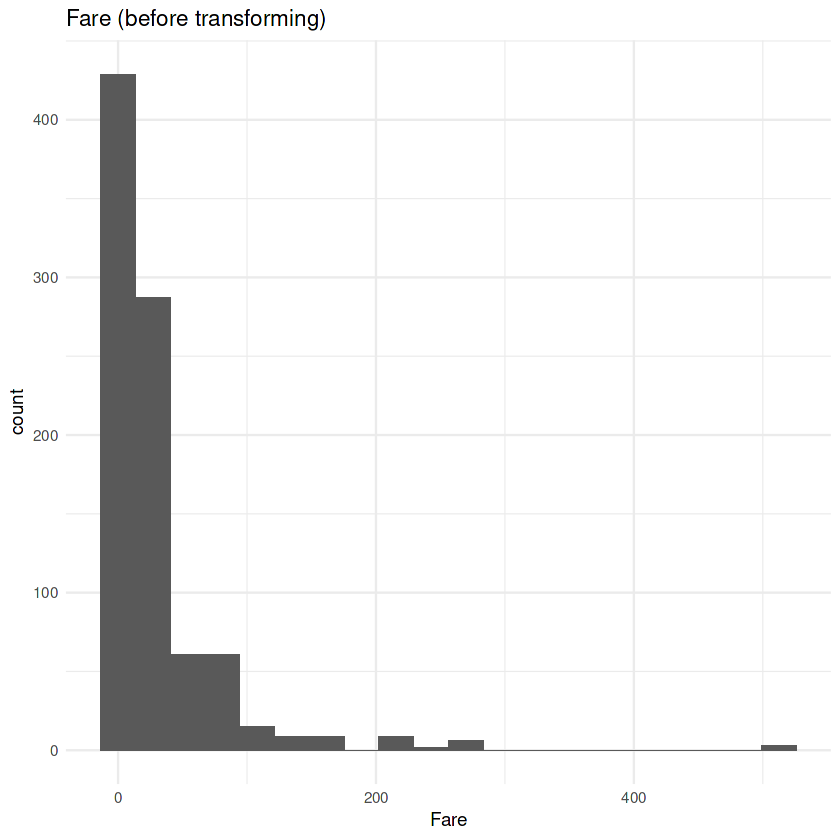

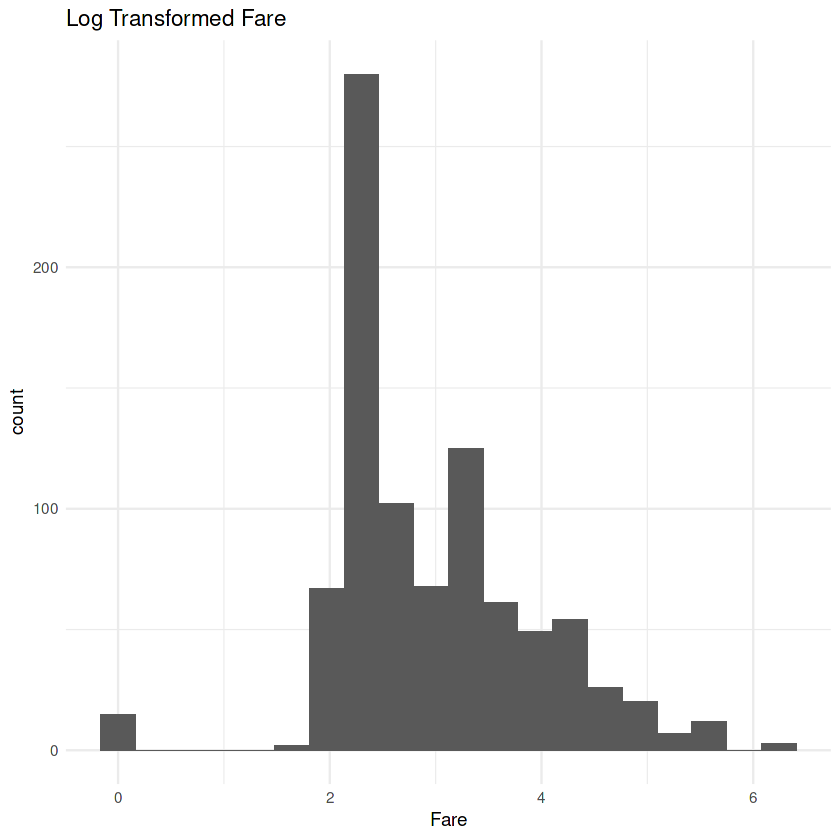

In [15]:
# Apply log transformation to Fare and FarePerPerson
#--plot shape before transformation?
ggplot(train, aes(x = Fare)) +
  geom_histogram(bins=20) +
  theme_minimal() +
  ggtitle("Fare (before transforming)")

#--note an extreme outlier over 500!
train$Fare <- log(train$Fare + 1)
train$FarePerPerson <- log(train$FarePerPerson + 1)
test$Fare <- log(test$Fare + 1)
test$FarePerPerson <- log(test$FarePerPerson + 1)
head(train[, c("Fare", "FarePerPerson")])
head(test[, c("Fare", "FarePerPerson")])

ggplot(train, aes(x = Fare)) +
  geom_histogram(bins=20) +
  theme_minimal() +
  ggtitle("Log Transformed Fare")

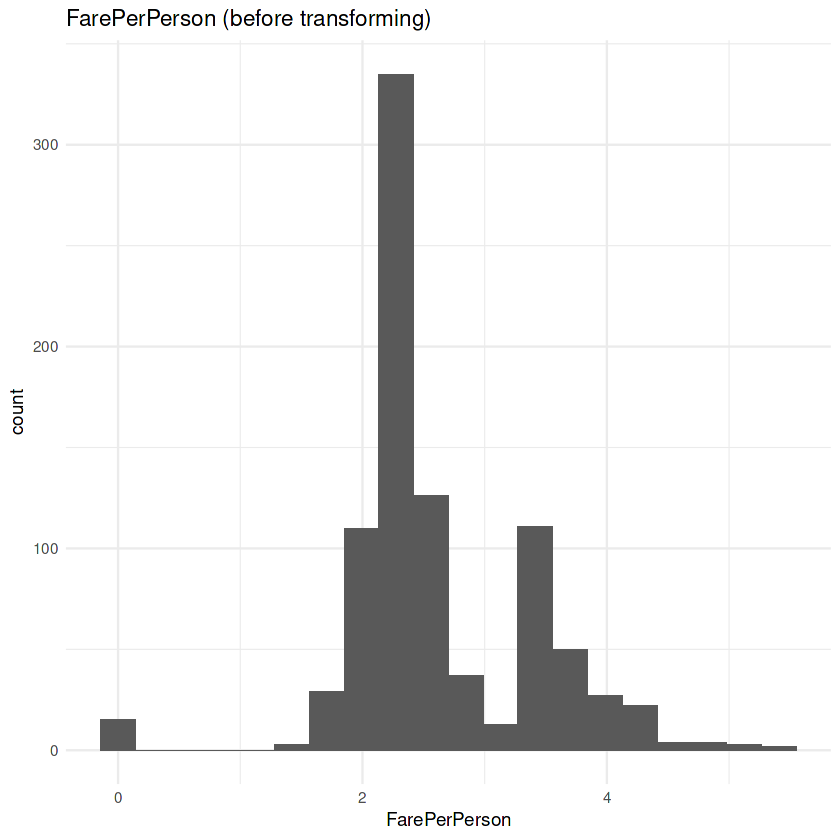

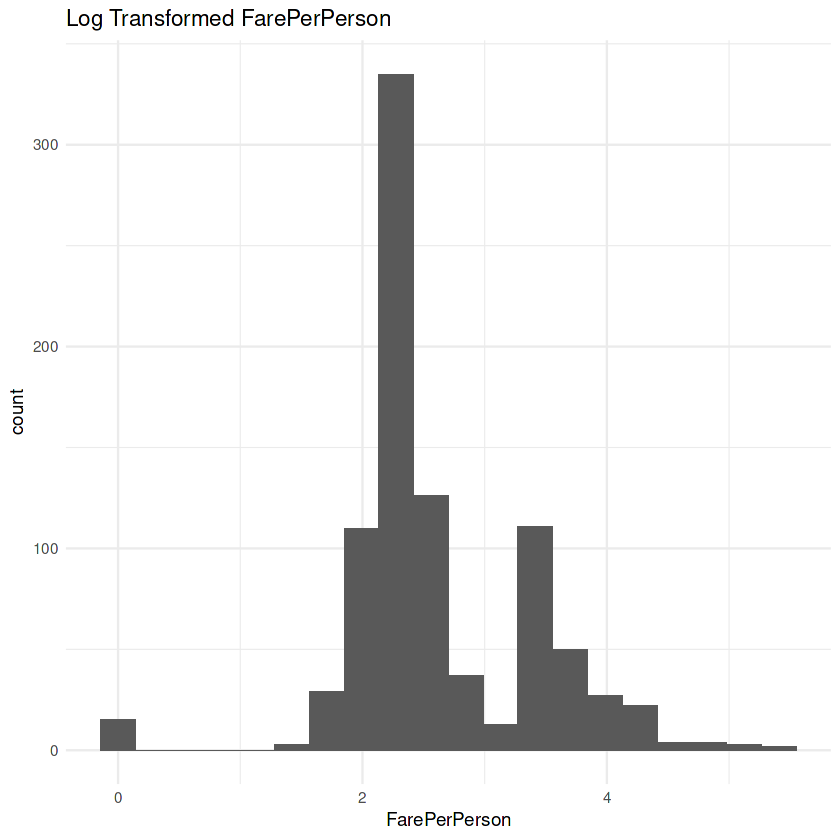

In [16]:
# plot FarePerPerson before and after transformation
ggplot(train, aes(x = FarePerPerson)) +
  geom_histogram(bins=20) +
  theme_minimal() +
  ggtitle("FarePerPerson (before transforming)")

ggplot(train, aes(x = FarePerPerson)) +
  geom_histogram(bins=20) +
  theme_minimal() +
  ggtitle("Log Transformed FarePerPerson")

# Create the `ChildInFamily` Feature

The `ChildInFamily` feature is engineered to identify children who are part of a family group, which might have influenced their chances of survival during the Titanic disaster. This feature is created by checking two conditions: the passenger's age is less than 15, and they are part of a family with more than one member (`FamilySize > 1`). If both conditions are met, the `ChildInFamily` feature is set to 1, indicating that the passenger is a child in a family; otherwise, it is set to 0.

The rationale behind this feature is that children traveling with family members might have had different survival dynamics compared to those traveling alone or with non-family members. Families might have prioritized the safety of their children during the evacuation, potentially affecting survival outcomes. By incorporating `ChildInFamily` into the model, we aim to capture these social dynamics and improve the model's ability to predict survival accurately. This feature adds a layer of understanding to the dataset, highlighting the potential impact of familial relationships on survival rates.


In [17]:
# Create the ChildInFamily feature
train$ChildInFamily <- as.factor(ifelse(train$Age < 15 & train$FamilySize > 1, 1, 0))
test$ChildInFamily <- as.factor(ifelse(test$Age < 15 & test$FamilySize > 1, 1, 0))

# Inspect the new feature
head(train[, c("Age", "FamilySize", "ChildInFamily")])
head(test[, c("Age", "FamilySize", "ChildInFamily")])

Age      FamilySize ChildInFamily
1 22.00000 2          0            
2 38.00000 2          0            
3 26.00000 1          0            
4 35.00000 2          0            
5 35.00000 1          0            
6 33.17887 1          0

Age  FamilySize ChildInFamily
1 34.5 1          0            
2 47.0 2          0            
3 62.0 1          0            
4 27.0 1          0            
5 22.0 3          0            
6 14.0 1          0

# Explicitly Cast Features as Integers

In this section, we ensure that specific features in the dataset are explicitly cast as integers. This step is crucial for maintaining data consistency and ensuring that the machine learning models interpret these features correctly. The features `GroupSize`, `FamilySize`, `SibSp`, and `Parch` are inherently numerical and represent counts of people (e.g., number of siblings/spouses, number of parents/children). By explicitly casting these features as integers, we prevent any potential issues that might arise from incorrect data types, such as floating-point representations or character strings, which could lead to errors in model training or interpretation.

This explicit casting is particularly important when preparing data for machine learning models, as it ensures that the models receive the data in the expected format, thereby improving the reliability and accuracy of the predictions. By maintaining the integrity of these features, we enhance the overall quality of the dataset and the subsequent analysis.


In [18]:
# Explicitly cast as integers
train$GroupSize <- as.integer(train$GroupSize)
test$GroupSize <- as.integer(test$GroupSize)
train$FamilySize <- as.integer(train$FamilySize)
test$FamilySize <- as.integer(test$FamilySize)
train$SibSp <- as.integer(train$SibSp)
test$SibSp <- as.integer(test$SibSp)
train$Parch <- as.integer(train$Parch)
test$Parch <- as.integer(test$Parch)

# Drop Name, Ticket, Cabin, Embarked

In this step, we remove several columns from the dataset that are deemed unnecessary for the predictive modeling task. The columns `Name`, `Ticket`, `Cabin`, and `Embarked` are dropped for the following reasons:

- **`Name`**: While the `Name` column contains potentially useful information such as titles, this information has already been extracted into a separate `Title` feature. The remaining data in the `Name` column is not directly useful for prediction and can introduce noise into the model.

- **`Ticket`**: Although ticket numbers might contain patterns or group information, this has been captured in the `GroupSize` feature. The raw ticket numbers are often inconsistent and noisy, making them less useful for direct inclusion in the model.

- **`Cabin`**: The `Cabin` column has a significant amount of missing data, and its useful information has been distilled into the `Deck` and `HasCabin` features. Retaining the raw `Cabin` data could complicate the model without adding value.

- **`Embarked`**: The `Embarked` column has been one-hot encoded into separate features (`EmbarkedC`, `EmbarkedQ`, `EmbarkedS`), which are more suitable for machine learning models. The original `Embarked` column is therefore redundant.

By dropping these columns, we streamline the dataset, focusing on features that are more likely to contribute to the model's predictive power. This step helps in reducing dimensionality and potential overfitting, ensuring that the model remains efficient and interpretable.


In [19]:
# drop Name, Ticket, Cabin, Embarked
train <- train %>% select(-Name, -Ticket, -Cabin) # Embarked dropped earlier
test <- test %>% select(-Name, -Ticket, -Cabin) # Embarked dropped earlier

# Train the SVM Model and Predict Survival
In this section, we focus on training a Support Vector Machine (SVM) model to predict the survival of passengers on the Titanic. The SVM algorithm is chosen for its effectiveness in handling high-dimensional spaces and its ability to find the optimal hyperplane for classification tasks. It is particularly useful for datasets with complex relationships among features.

To train the model, we first set a random seed for reproducibility using `set.seed(666)`. This ensures that the results can be consistently reproduced. We then define a cross-validation control using `trainControl` from the caret package, specifying a 10-fold cross-validation method. This approach helps in assessing the model's performance and reducing overfitting by evaluating it on different subsets of the data.

The model is trained using the `train` function from the `caret` package, with `Survived` as the response variable and a comprehensive set of predictors, including `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `EmbarkedC`, `EmbarkedQ`, `EmbarkedS`, `HasCabin`, `FamilySize`, `Title`, `Deck`, `GroupSize`, `FarePerPerson`, and `ChildInFamily`. These features capture various aspects of the passengers' demographics, socio-economic status, and travel details, which are crucial for predicting survival.

The `method = "svmRadial"` argument specifies that an SVM model with a radial kernel is to be used, and `tuneLength = 10` indicates that the model should explore 10 different hyperparameter settings to find the best configuration. After training, the cross-validation results are printed to evaluate the model's performance.

Finally, the trained SVM model is used to predict the `Survived` status for the `test` dataset. The predictions are stored in the `Survived` column of the test dataset. A submission file is then created, containing the `PassengerId` and the predicted `Survived` status, which can be used for evaluation in a competition setting, such as the Kaggle Titanic competition. This comprehensive approach ensures that the model is well-tuned and capable of making accurate predictions based on the features engineered and selected during the data preprocessing phase.

In [20]:
# Load necessary libraries
library(e1071)
library(caret)

# Set seed for reproducibility
set.seed(666)

# Define cross-validation control
svm_cv_control <- trainControl(method = "cv", number = 10)

# Train the SVM model with cross-validation
svm_cv_model <- train(
  Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + EmbarkedC + EmbarkedQ + EmbarkedS + HasCabin + FamilySize + Title + Deck + GroupSize + FarePerPerson + ChildInFamily,
  data = train,
  method = "svmRadial",
  trControl = svm_cv_control,
  tuneLength = 10
)

# Print the cross-validation results
print(svm_cv_model)

# Use the trained SVM model to predict Survived in the test dataset
test$Survived <- predict(svm_cv_model, newdata = test)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute


Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”
Warning mess

Support Vector Machines with Radial Basis Function Kernel 

891 samples
 16 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 801, 802, 803, 802, 802, 802, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.7610175  0.4721180
    0.50  0.7869620  0.5369689
    1.00  0.7992850  0.5675198
    2.00  0.8104338  0.5929653
    4.00  0.8013946  0.5721443
    8.00  0.7980232  0.5635095
   16.00  0.7879480  0.5408747
   32.00  0.7823420  0.5281718
   64.00  0.7733787  0.5124614
  128.00  0.7677222  0.4983796

Tuning parameter 'sigma' was held constant at a value of 0.0636033
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.0636033 and C = 2.


In [21]:
# Train the random forest model
#set.seed(666)
#rf_cv_control <- trainControl(method = "cv", number = 10)
#rf_model <- train(
#  Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + EmbarkedC + EmbarkedQ + EmbarkedS + HasCabin + FamilySize + Title + Deck + GroupSize + FarePerPerson + ChildInFamily, 
#  data = train,
#  method = "rf",
#  trControl = rf_cv_control,
#    tuneLength = 10
#)

# Print the cross-validation results
#print(rf_model)

# Use the trained random forest model to predict Survived in the test dataset
#test$Survived <- predict(rf_model, newdata = test)

## Create Submission File

In the final step of the script, we prepare a submission file for evaluation. This involves selecting the relevant columns from the test dataset and writing them to a CSV file. Specifically, we extract the `PassengerId` and the predicted `Survived` status for each passenger in the test dataset. The `PassengerId` serves as a unique identifier for each passenger, while the `Survived` column contains the model's predictions, indicating whether each passenger survived the Titanic disaster.

The `select` function from the `dplyr` package is used to create a new dataframe, `submission`, containing only these two columns. This streamlined dataframe is then written to a CSV file named `submission.csv` using the `write.csv` function. The argument `row.names = FALSE` ensures that row numbers are not included in the output file, which is a common requirement for submission files in data science competitions.

This submission file is formatted for easy evaluation, such as in the Kaggle Titanic competition, where participants submit their predictions for scoring. By following this structured approach, the script ensures that the output is ready for immediate use in assessing the model's performance against the competition's test dataset.


In [22]:
# Create submission file
submission <- test %>% select(PassengerId, Survived)
write.csv(submission, "submission.csv", row.names = FALSE)

# Evaluating Feature Importance in the Random Forest Model

Understanding which features contribute most significantly to a model's predictions is crucial for interpreting the model and improving its performance. In this script, we focus on evaluating the feature importance of a random forest model trained on the Titanic dataset. Feature importance provides insights into the relative influence of each feature on the model's decision-making process, helping to identify which variables are most predictive of passenger survival.

The random forest algorithm, being an ensemble of decision trees, naturally provides a measure of feature importance. This is typically calculated based on the decrease in node impurity (e.g., Gini impurity or entropy) brought about by each feature across all trees in the forest. Features that result in larger decreases in impurity are considered more important.

In this script, we utilize the `caret` package to extract and visualize feature importance from the trained random forest model. The `varImp` function is employed to quantify the importance of each feature, and `ggplot2` is used to create a visual representation of these importance scores. This visualization helps in quickly identifying the most influential features, which can guide further feature engineering and model refinement efforts.

By analyzing feature importance, we can gain valuable insights into the factors that most strongly influence survival predictions, potentially uncovering new avenues for improving the model's accuracy and interpretability. This step is an integral part of the model evaluation process, ensuring that the model not only performs well but also provides meaningful insights into the underlying data.


In [23]:
# Extract feature importance
importance_values <- varImp(svm_cv_model, scale = FALSE)

# Convert to a data frame for easier plotting
importance_df <- as.data.frame(importance_values$importance)
importance_df$Feature <- rownames(importance_df)

# Plot feature importance
ggplot(importance_df, aes(x = reorder(Feature, Overall), y = Overall)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Feature Importance from Random Forest Model",
       x = "Feature",
       y = "Importance")

# Print the feature importance values
print(importance_df)

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Overall' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

                     X0        X1       Feature
Pclass        0.6814170 0.6814170        Pclass
Sex           0.7668728 0.7668728           Sex
Age           0.5288430 0.5288430           Age
SibSp         0.5431619 0.5431619         SibSp
Parch         0.5612171 0.5612171         Parch
Fare          0.6921223 0.6921223          Fare
EmbarkedC     0.5676589 0.5676589     EmbarkedC
EmbarkedQ     0.5010545 0.5010545     EmbarkedQ
EmbarkedS     0.5716374 0.5716374     EmbarkedS
HasCabin      0.6368996 0.6368996      HasCabin
FamilySize    0.5863878 0.5863878    FamilySize
Title         0.6507765 0.6507765         Title
Deck          0.6358877 0.6358877          Deck
GroupSize     0.5938229 0.5938229     GroupSize
FarePerPerson 0.6867084 0.6867084 FarePerPerson
ChildInFamily 0.5273464 0.5273464 ChildInFamily


# Top Features

1. **`Sex`**: This feature has the highest importance score, indicating that gender is a crucial factor in predicting survival. The binary encoding (`1` for male, `0` for female) suggests that gender differences played a significant role in survival outcomes.

2. **`Age`**: `Age` is another highly important feature, reflecting its impact on survival. Younger passengers, particularly children, may have had different survival rates compared to adults.

3. **`FarePerPerson`**: This feature captures the fare normalized by the number of passengers sharing a ticket. Its high importance suggests that economic factors, as reflected by fare distribution, significantly influenced survival.

4. **`Fare`**: The total fare paid by a passenger also plays a critical role, indicating that passengers who paid higher fares might have had better access to resources or safer accommodations.

5. **`FamilySize`**: This feature indicates the total number of family members aboard. Its importance suggests that family dynamics and group behavior influenced survival chances.

6. **`Pclass`**: The linear component of the passenger class, indicating socio-economic status, is also important. Higher classes likely had better survival rates.

### Moderate Features

- **`GroupSize`**: The number of passengers sharing a ticket, which may capture social dynamics.
- **`SibSp`**: The number of siblings/spouses aboard, indicating family connections.
- **`Deck`**: Passengers with unknown deck information, which might relate to missing data patterns.

### Less Important Features

- **Titles**: Specific titles like `Mr`, `Miss`, and `Master` have varying levels of importance, reflecting social status and age-related trends.
- **`Embarked`**: The port of embarkation has lower importance, suggesting it had less impact on survival.
- **Decks**: Specific deck letters have varying importance, possibly indicating differences in cabin locations.

### Insights

The feature importance analysis highlights the significance of socio-demographic factors (like gender and age), economic indicators (like fare), and family dynamics in predicting survival. Understanding these influences can guide further model refinement and feature engineering efforts.
